In [1]:
import gpflow
import gpflux
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from gpflux.nonstationary import NonstationaryKernel
from plotting import plot_layers

In [2]:
Ns = 1000
D = 1
a, b = 0, 1
X = np.linspace(a, b, 1000).reshape(-1, 1)
Xlam = np.c_[X, np.zeros_like(X)]

In [3]:
D_in = D1 = D2 = D_out = D

# Layer 1
Z1 = X.copy()
feat1 = gpflow.features.InducingPoints(Z1)
kern1 = gpflow.kernels.RBF(D_in, lengthscales=0.1)
layer1 = gpflux.layers.GPLayer(kern1, feat1, D1)

# Layer 2
Z2 = Xlam.copy()
feat2 = gpflow.features.InducingPoints(Z2)
kern2 = NonstationaryKernel(gpflow.kernels.RBF(D1), D_in, scaling_offset=-0.1,
                            positivity=gpflow.transforms.positive.forward_tensor)
layer2 = gpflux.layers.NonstationaryGPLayer(kern2, feat2, D2)

# Layer 3
Z3 = Xlam.copy()
feat3 = gpflow.features.InducingPoints(Z3)
kern3 = NonstationaryKernel(gpflow.kernels.RBF(D2), D1, scaling_offset=-0.1,
                            positivity=gpflow.transforms.positive.forward_tensor)
layer3 = gpflux.layers.NonstationaryGPLayer(kern3, feat3, D_out)

model = gpflux.DeepGP(np.empty((1, 1)), np.empty((1, 1)), [layer1, layer2, layer3])

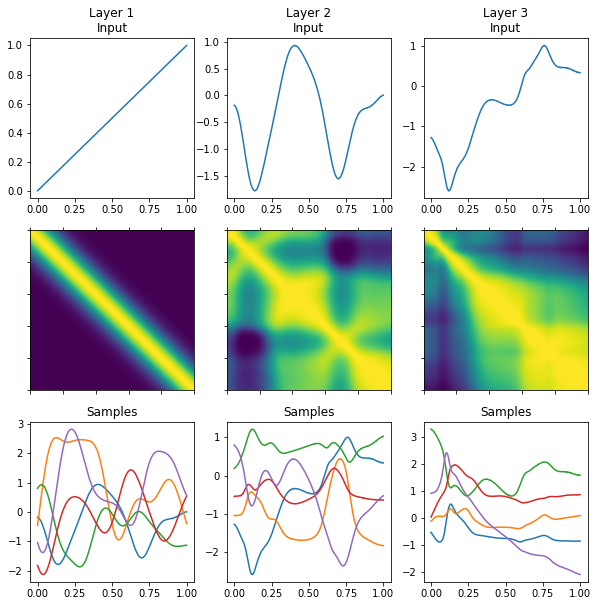

In [4]:
plot_layers(X, model)
plt.show()